En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [2]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Taiwanese_Monk_at_the_Salar_of_Uyuni%2C_Bolivia.jpg/1920px-Taiwanese_Monk_at_the_Salar_of_Uyuni%2C_Bolivia.jpg -O salar_uyuni_person.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/%E5%A4%A7%E7%B2%92_%E4%B8%AD%E7%B2%92_%2845700991055%29.jpg/1024px-%E5%A4%A7%E7%B2%92_%E4%B8%AD%E7%B2%92_%2845700991055%29.jpg -O frutillas.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/2/24/LZA_500.jpg -O "semaforo-ruta.jpg"

--2025-05-02 02:09:06--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Taiwanese_Monk_at_the_Salar_of_Uyuni%2C_Bolivia.jpg/1920px-Taiwanese_Monk_at_the_Salar_of_Uyuni%2C_Bolivia.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208803 (204K) [image/jpeg]
Saving to: ‘salar_uyuni_person.jpg’

salar_uyuni_person. 100%[===================>] 203.91K  --.-KB/s    in 0.006s  

2025-05-02 02:09:06 (31.5 MB/s) - ‘salar_uyuni_person.jpg’ saved [208803/208803]

--2025-05-02 02:09:06--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/%E5%A4%A7%E7%B2%92_%E4%B8%AD%E7%B2%92_%2845700991055%29.jpg/1024px-%E5%A4%A7%E7%B2%92_%E4%B8%AD%E7%B2%92_%2845700991055%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org

In [3]:
def visualizar_imagen(im, titulo=None, gama=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(im, cmap=gama)
    plt.axis('off')  # Ocultar ejes
    plt.title(titulo)
    plt.show()

def propiedades_imagen_mplot(im):
    print(f"""
    Dimensiones (alto, ancho, canales): {im.shape}
    Tipo de dato: {im.dtype}
    Tipo de objeto: {type(im)}
    """)

def comparar_imagenes_grilla(img_original,img1, img2, titulo_img1, titulo_img2, titulo_img_original="Imagen original"):
    # Mostrar imagen segmentada
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_original)
    axes[0].set_title(titulo_img_original)
    axes[0].axis("off")

    axes[1].imshow(img1, cmap="gray")
    axes[1].set_title(titulo_img1)
    axes[1].axis("off")

    axes[2].imshow(img2)
    axes[2].set_title(titulo_img2)
    axes[2].axis("off")
    plt.tight_layout()
    plt.show()

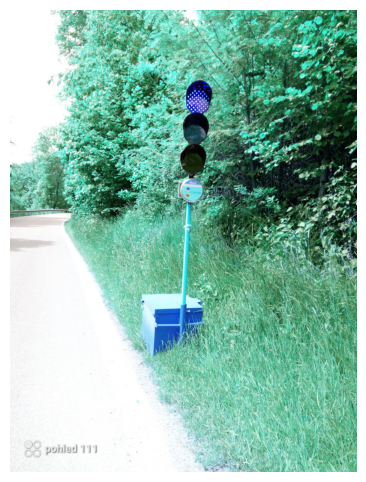

In [4]:
# nombre_img = 'salar_uyuni_person.jpg'
nombre_img = "semaforo-ruta.jpg"
#nombre_img = "frutillas.jpg"
img = cv2.imread(nombre_img)
visualizar_imagen(img)

In [5]:
propiedades_imagen_mplot(img)


    Dimensiones (alto, ancho, canales): (4160, 3120, 3)
    Tipo de dato: uint8
    Tipo de objeto: <class 'numpy.ndarray'>
    


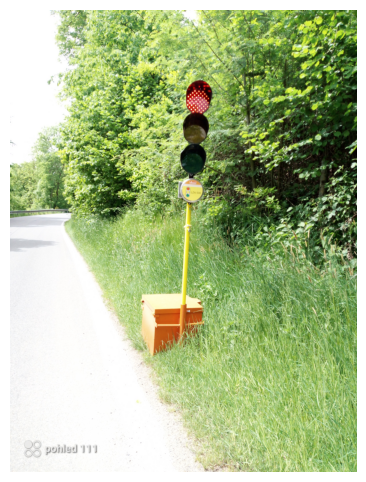

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib
visualizar_imagen(img_rgb)

##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

In [7]:
#J = img_rgb.copy()  # Hacer una copia de la imagen original
J = img.copy()  # Hacer una copia de la imagen original

J[:, :, 0] = cv2.equalizeHist(img[:, :, 0])  # Ecualizar el canal Rojo
J[:, :, 1] = cv2.equalizeHist(img[:, :, 1])  # Ecualizar el canal Verde
J[:, :, 2] = cv2.equalizeHist(img[:, :, 2])  # Ecualizar el canal Azul

cv2.equalizeHist() mejora el contraste de una imagen ajustando su distribución de intensidad.

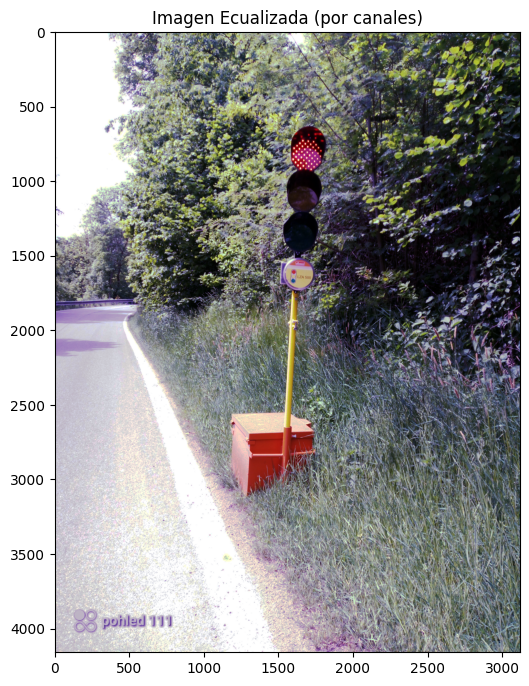

In [8]:
img_equalizada = cv2.cvtColor(J, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(img_equalizada)  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (por canales)')  # Título
plt.show()  # Mostrar

## Convertir a HSV y Ecualizar

In [9]:
K = img.copy()  # Hacer una copia de la imagen original
img_hsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)  # Convertir a HSV
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])  # Ecualizar el canal de brillo (V)
Knew = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGRimg

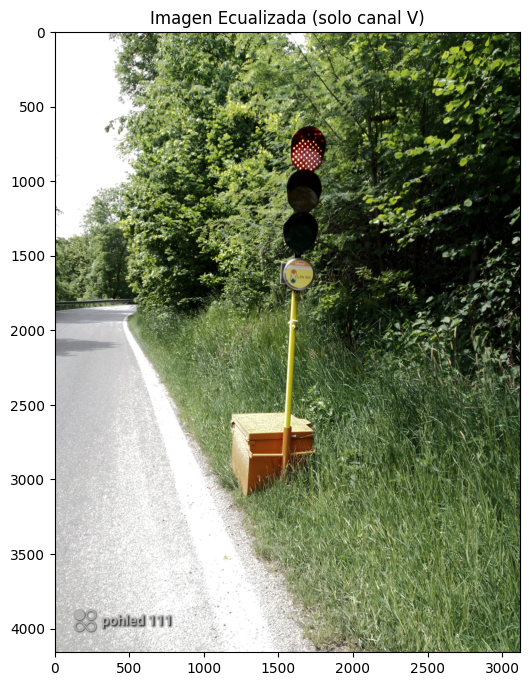

In [10]:
img_brillo_equal = cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(img_brillo_equal)  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (solo canal V)')  # Título
plt.show()  # Mostrar figura

### Comparción foto original

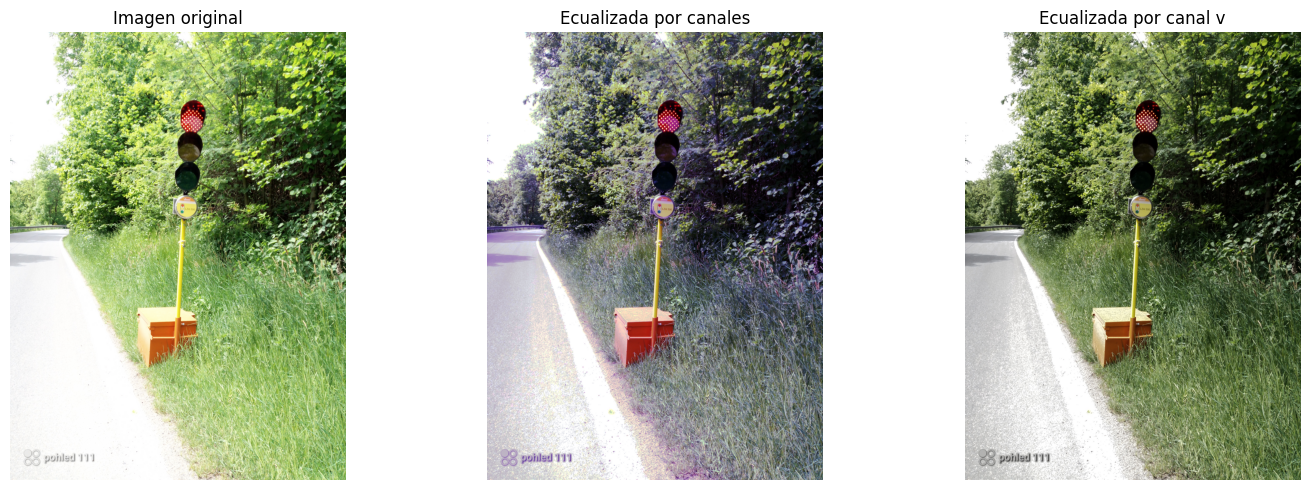

In [11]:
comparar_imagenes_grilla(img_rgb, img_equalizada, img_brillo_equal, "Ecualizada por canales", "Ecualizada por canal v")

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [12]:
# Segmentación básica por color utilizando HSV
# Definir el rango de color a segmentar (ejemplo: rojo)
limite_inferior_rojo = np.array([165, 100, 70])
limite_superior_rojo = np.array([180, 255, 255])

mascara_roja = cv2.inRange(img_hsv, limite_inferior_rojo, limite_superior_rojo)
# Aplicar la máscara a la imagen original
resultado_rojo = cv2.bitwise_and(img_brillo_equal, img_brillo_equal, mask=mascara_roja)


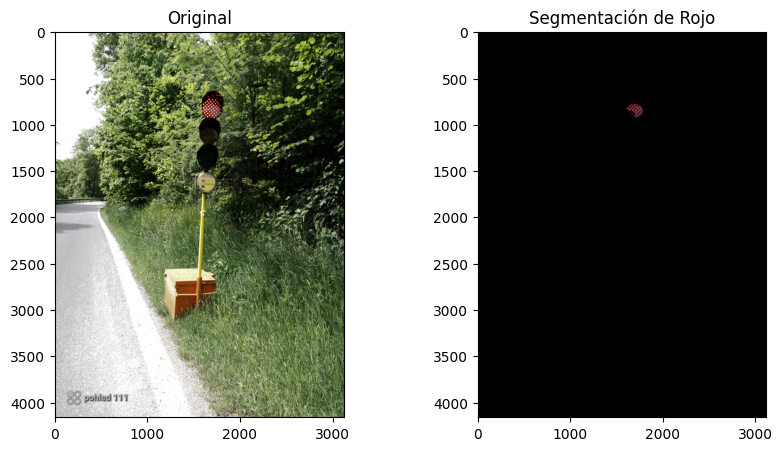

In [13]:
# Mostrar el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_brillo_equal)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(resultado_rojo)
plt.title('Segmentación de Rojo')
plt.show()

## Aplitud de color rojo


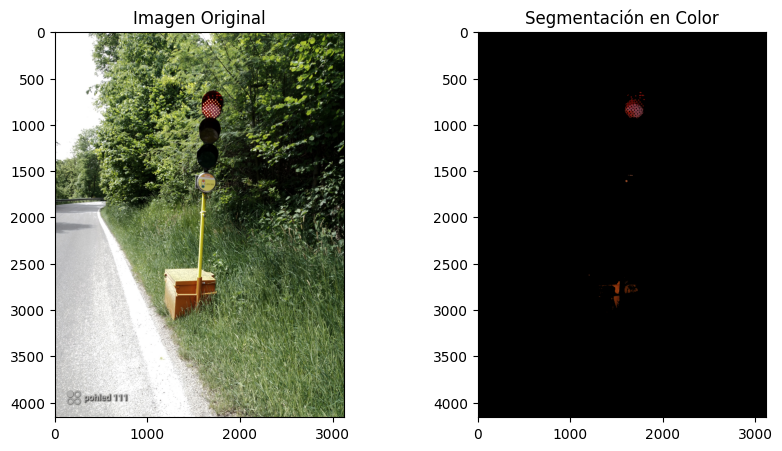

In [14]:
# Definir rangos de rojo
rojo_bajo = np.array([0, 120, 70])
rojo_alto = np.array([10, 255, 255])
rojo_bajo2 = np.array([170, 120, 70])
rojo_alto2 = np.array([180, 255, 255])

# rojo_bajo = (0, 100, 100)  # Tono, Saturación, Valor (mínimos)
# rojo_alto = (10, 255, 255)  # Tono, Saturación, Valor (máximos)
# rojo_bajo2 = (170, 100, 100)
# rojo_alto2 = (180, 255, 255)

# Crear máscara para ambos rangos
mascara1 = cv2.inRange(img_hsv, rojo_bajo, rojo_alto)
mascara2 = cv2.inRange(img_hsv, rojo_bajo2, rojo_alto2)

# Combinar máscaras
mascara_roja = cv2.bitwise_or(mascara1, mascara2)

# Aplicar la máscara a la imagen original para obtener la segmentación en color
imagen_segmentada = cv2.bitwise_and(img_brillo_equal, img_brillo_equal, mask=mascara_roja)

# Mostrar la imagen original y la segmentación en color juntas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_brillo_equal)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)  # Mostrar la segmentación en color
plt.title('Segmentación en Color')

plt.show()

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

In [15]:
#img_rgb_prueba = img_brillo_equal.copy()
#cv2.putText(img_rgb_prueba, "semaforo luz roja", (500, 200),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
#cv2.rectangle(img_rgb_prueba, (500, 220), (800, 1000), (0, 255, 0), 5)

#plt.imshow(img_rgb_prueba);

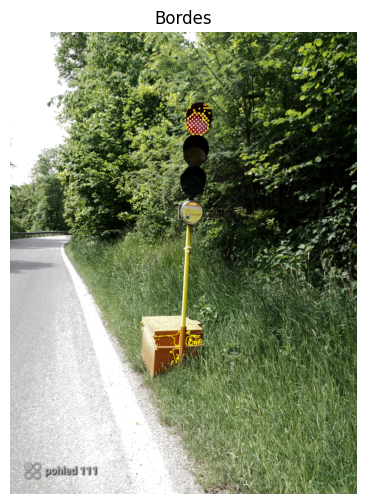

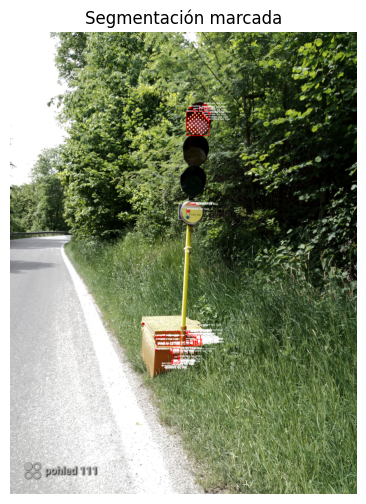

In [16]:
# Paso 1: encontrar los contornos en la máscara
contornos, _ = cv2.findContours(mascara_roja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Paso 2: copiar la imagen original para no modificarla
imagen_bordes = img_brillo_equal.copy()  # Asegurate de que esté en RGB

# Paso 3: dibujar los contornos sobre la imagen
cv2.drawContours(imagen_bordes, contornos, -1, color=(255, 255, 10), thickness=4)  # rojo
visualizar_imagen(imagen_bordes, "Bordes")

# Obtener contornos de la máscara
contornos, _ = cv2.findContours(mascara_roja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creo copia para no modigicar la imagen original
imagen_borde_rectangulo = img_brillo_equal.copy()
# Dibujar el rectángulo si se encontró algún objeto segmentado
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)  # Coordenadas del rectángulo
    cv2.rectangle(imagen_borde_rectangulo, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Azul en BGR
    cv2.putText(imagen_borde_rectangulo, "semaforo luz roja", (x, y),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# Mostrar la imagen con la segmentación marcada
visualizar_imagen(imagen_borde_rectangulo, "Segmentación marcada")

In [17]:
plt.imsave("semaforo_ruta_bordes.jpg", imagen_borde_rectangulo)

Como hay muchos puntos que se resaltaron, esto produce muchos textos que marcan los puntos.

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución